In [1]:
import os
import cv2
import torch
import numpy as np
import torch.nn as nn
from glob import glob
import matplotlib.pyplot as plt

import ultralytics
from ultralytics import YOLO

from plotimages import yolo2bbox, plot_box, plot

In [2]:
ultralytics.checks()
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
CUDA_VERSION = torch.version.cuda if DEVICE == "cuda" else "-"
print(f"Device: {DEVICE}. CUDA version: {CUDA_VERSION}.")

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Setup complete ✅ (24 CPUs, 125.6 GB RAM, 13.9/25.0 GB disk)
Device: cuda. CUDA version: 12.1.


In [3]:
!ls datasets/truck-dataset/images/train -1 | wc -l
!ls datasets/truck-dataset/labels/train -1 | wc -l
!ls datasets/truck-dataset/images/val -1 | wc -l
!ls datasets/truck-dataset/labels/val -1 | wc -l

6022
6022
250
250


['0']
['0']
['0']
['0']


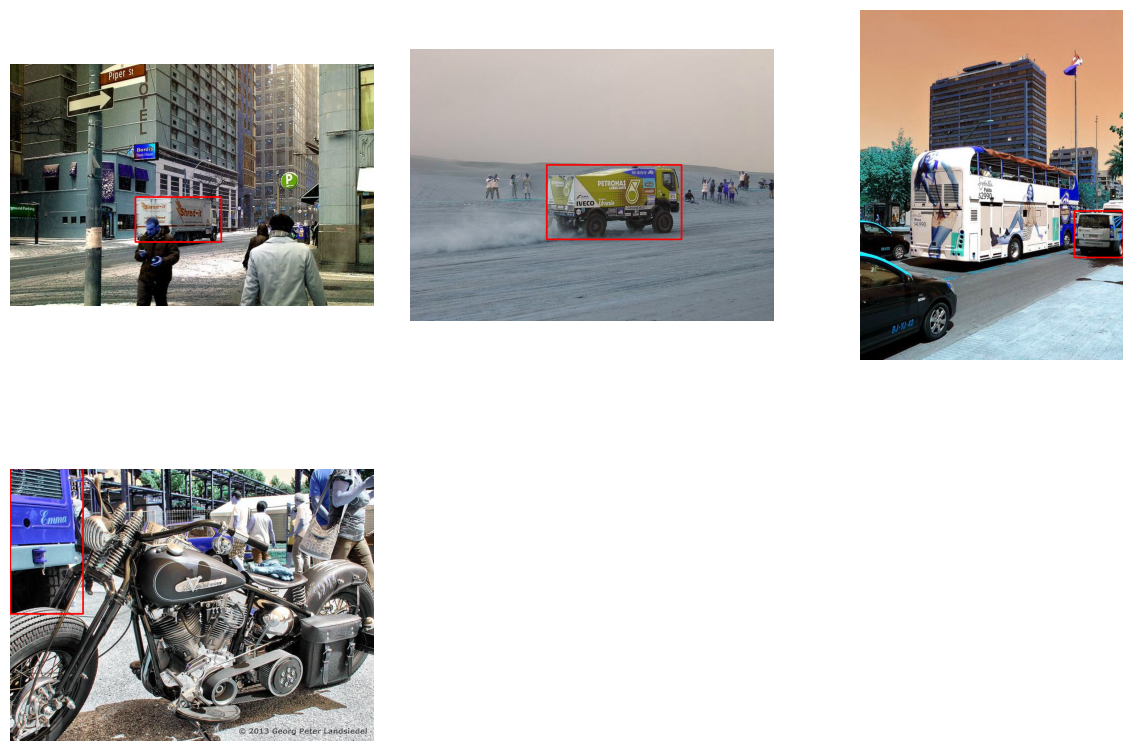

In [5]:
plot("datasets/truck-dataset/images/train", "datasets/truck-dataset/images/labels/train", 4)

In [6]:
yolo = YOLO(model="runs/detect/yolov8_truck_best/weights/best.pt")
# yolo.info(True)

In [9]:
results = yolo.train(
    data = "truck-dataset.yaml",
    imgsz = 320 * 3,
    epochs = 20,
    batch = 32,
    name = "yolov8_truck_2",
    freeze = 20,
    # resume=True,
    save = True,
    save_dir="YOLOv8/",
    lr0=0.005,
    lrf=0.01,
    optimizer="Adam",
    plots=True,
    workers=8,
)

New https://pypi.org/project/ultralytics/8.1.25 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/yolov8_truck_2/weights/last.pt, data=truck-dataset.yaml, epochs=20, time=None, patience=100, batch=32, imgsz=960, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_truck_22, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=20, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mask

train: Scanning /root/yolo/datasets/truck-dataset/labels/train.cache... 6022 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6022/6022 [00:00<?, ?it/s]
val: Scanning /root/yolo/datasets/truck-dataset/labels/val.cache... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8_truck_22/labels.jpg... 
optimizer: Adam(lr=0.005, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 960 train, 960 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8_truck_22
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      5.44G     0.9197     0.9749      1.206         18        960: 100%|██████████| 189/189 [01:31<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        250        414       0.59      0.621      0.618      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      5.23G     0.9274     0.9752      1.212         21        960: 100%|██████████| 189/189 [01:29<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        250        414      0.699       0.56      0.639       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       5.3G     0.9407     0.9995      1.218         22        960: 100%|██████████| 189/189 [01:28<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        250        414      0.688      0.536       0.62      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       5.3G     0.9573      1.029       1.23         22        960: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        250        414      0.636      0.586       0.62      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       5.3G     0.9631      1.028      1.237         26        960: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        250        414      0.613      0.594      0.615      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      5.65G     0.9582      1.029      1.233         11        960: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        250        414      0.658       0.57       0.63      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      5.49G     0.9461      1.005      1.224         18        960: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        250        414      0.624      0.585      0.592      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20       5.5G     0.9481      1.008      1.224         17        960: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        250        414      0.648      0.616      0.642      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      5.49G     0.9562      1.022      1.225         19        960: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        250        414      0.691      0.597      0.644      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       5.5G     0.9435      1.001      1.219         16        960: 100%|██████████| 189/189 [01:28<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        250        414      0.651      0.618      0.642      0.422


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       5.5G     0.9971      1.053      1.263          8        960: 100%|██████████| 189/189 [01:29<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        250        414      0.647      0.598      0.627      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       5.5G     0.9823      1.035      1.255         16        960: 100%|██████████| 189/189 [01:27<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        250        414      0.644      0.603      0.619       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       5.5G     0.9763      1.017      1.241          7        960: 100%|██████████| 189/189 [01:28<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        250        414      0.716      0.565      0.635      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       5.5G     0.9696      1.011      1.238          6        960: 100%|██████████| 189/189 [01:27<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        250        414      0.663      0.577      0.628      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       5.5G     0.9657      1.003      1.234         13        960: 100%|██████████| 189/189 [01:28<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        250        414      0.604      0.602      0.623      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       5.5G     0.9499     0.9861      1.225         11        960: 100%|██████████| 189/189 [01:28<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        250        414      0.672      0.592      0.636      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       5.3G     0.9442     0.9757      1.217          7        960: 100%|██████████| 189/189 [01:28<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        250        414      0.689      0.572      0.638      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       5.3G     0.9457     0.9749       1.22         12        960: 100%|██████████| 189/189 [01:28<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        250        414      0.636      0.587      0.631      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       5.3G     0.9322     0.9598      1.213          7        960: 100%|██████████| 189/189 [01:27<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        250        414      0.687       0.58      0.638      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       5.3G     0.9269     0.9514      1.214          6        960: 100%|██████████| 189/189 [01:27<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        250        414      0.662      0.601      0.637      0.423



20 epochs completed in 0.509 hours.
Optimizer stripped from runs/detect/yolov8_truck_22/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/yolov8_truck_22/weights/best.pt, 52.1MB

Validating runs/detect/yolov8_truck_22/weights/best.pt...
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.2.1+cu121 CUDA:0 (NVIDIA RTX A4000, 16109MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]


                   all        250        414      0.646      0.617      0.642      0.431
Speed: 0.2ms preprocess, 8.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/yolov8_truck_22
